<a href="https://colab.research.google.com/github/jphammy/K-Means-Improved/blob/master/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from copy import deepcopy
import numpy as np
import pandas as pd

from array import array
from matplotlib import pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

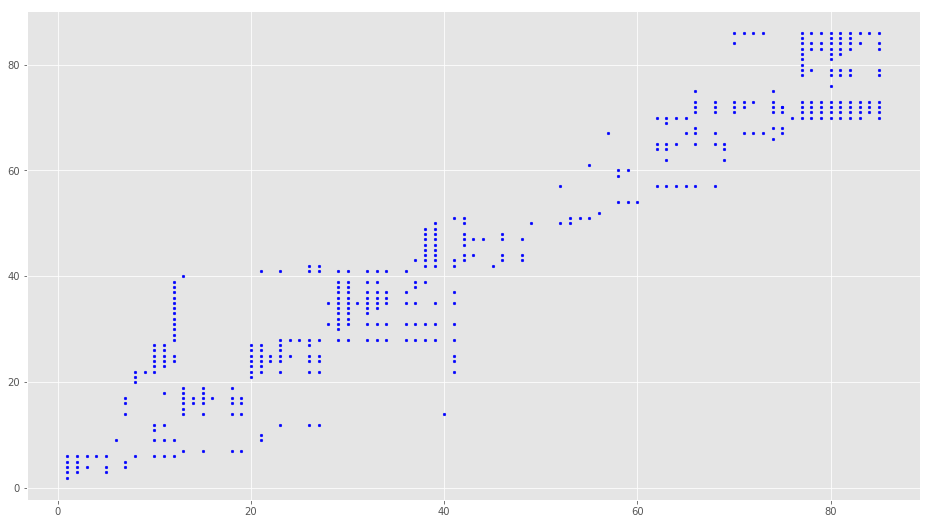

The centroids selected initially are 
[[ 1.  2.]
 [85. 86.]
 [ 1.  3.]
 [84. 86.]]


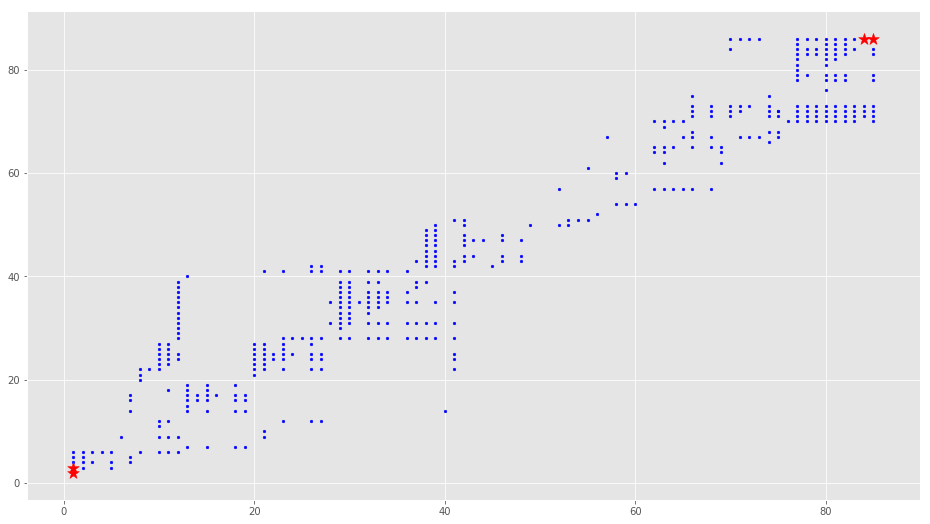

Iteration
[[ 1.        2.      ]
 [85.       77.333336]
 [23.346666 26.72889 ]
 [69.768295 69.310974]]
Iteration
[[ 7.114286   7.0285716]
 [80.41071   81.375    ]
 [26.20419   30.209425 ]
 [65.84615   64.15385  ]]
Iteration
[[ 8.4        9.0222225]
 [80.30666   79.293335 ]
 [26.939226  30.994474 ]
 [63.10204   62.408165 ]]
Iteration
[[ 8.791667  9.458333]
 [80.07143  78.46429 ]
 [27.146067 31.24719 ]
 [61.58427  61.483147]]
Iteration
[[ 8.98      9.78    ]
 [79.8      77.98889 ]
 [27.301136 31.40341 ]
 [60.542168 60.771084]]
Iteration
[[ 8.98      9.78    ]
 [79.645164 77.76344 ]
 [27.301136 31.40341 ]
 [60.       60.3875  ]]
Iteration
[[ 8.98      9.78    ]
 [79.645164 77.76344 ]
 [27.301136 31.40341 ]
 [60.       60.3875  ]]


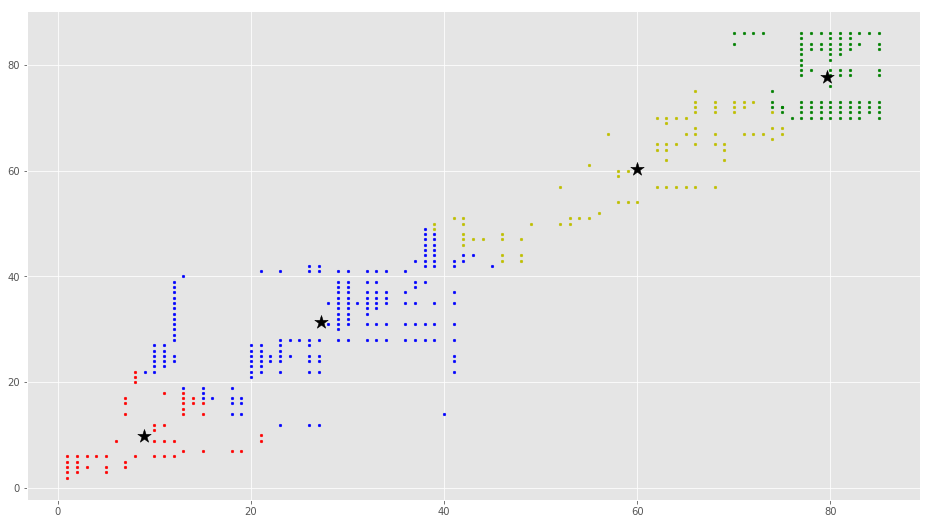

In [3]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

def dist(m, n, ax=1):
    d=np.linalg.norm(m-n, axis=ax)
    return d

data = pd.read_csv('399edges.csv')
data.head()
X = data['x'].values
Y = data['y'].values
arr = np.array(list(zip(X, Y)))
clusters = np.zeros(len(arr))
plt.scatter(X,Y,c='blue',s=7)
plt.show()
k = 4

cent=[]
centx=[]
centy=[]
max=0
td=0;
cent1=arr[1];
cent2=arr[2];
#finding two farthest points
for i in range(len(arr)):
    p=arr[i]
    for j in range(len(arr)):
        q=arr[j]
        td=dist(arr[i],arr[j],None)
        if(td>max):
            max=td
            cent1=p
            cent2=q
cent.append(list(cent1))
cent.append(list(cent2))
centx.append(cent1[0])
centx.append(cent2[0])
centy.append(cent1[1])
centy.append(cent2[1])

kcount=2
pt=[]
#Selecting remaining k-2 centriods
while(kcount<k):
    mean=np.mean(np.array(cent, dtype=np.float32), axis=0)  #representative centroid
    max=0
    for i in range(len(arr)):
        if(dist(mean,arr[i],None)>max and (list(arr[i]) not in cent)):
            max=dist(mean,arr[i],None)
            pt=arr[i]
    kcount=kcount+1
    cent.append(list(pt))
    centx.append(pt[0])
    centy.append(pt[1])

cent = np.array(cent, dtype=np.float32)
centx = np.array(centx, dtype=np.float32)
centy = np.array(centy, dtype=np.float32)

print("The centroids selected initially are ")
print(cent)

centold = np.zeros(cent.shape)

plt.scatter(X,Y,c='blue',s=7)
plt.scatter(centx,centy,marker='*',s=150,c='red')
plt.show()
error = dist(cent,centold,None)
count=1

distarray=np.array(range(len(arr)),dtype=np.float32)
#Clustering
while error!=0:
    for i in range(len(arr)):
        if(count>1 and (distarray[i]<dist(arr[i],cent[int(clusters[i])],None))):
            distances = dist(arr[i],cent)
            distarray[i]=min(distances)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        elif(count==1):
            distances = dist(arr[i],cent)
            distarray[i]=min(distances)
            cluster = np.argmin(distances)
            clusters[i] = cluster

    centold = deepcopy(cent)
    #Updating centriods
    for i in range(k):
        points = [arr[j] for j in range(len(arr)) if clusters[j] == i]
        cent[i] = np.mean(points, axis=0)
    error = dist(cent,centold, None)
    print ("Iteration"), count,( "   => Centroids are ")
    print (cent)
    count=count+1

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([arr[j] for j in range(len(arr)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(cent[:, 0],cent[:, 1],marker='*',s=200,c='black')
plt.show()